 **Assignment 2**

*1. Download the dataset: Dataset(penguins_size)*

*importing the necessary libraries:*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


*2.load the dataset:*

In [3]:
# Load the dataset
data = "penguins_size.csv"
df = pd.read_csv(data)


In [4]:
column_names = df.columns
print("Column Names:")
print(column_names)

Column Names:
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


*3. Perform Visualizations.*

*a.Univariate Analysis:*

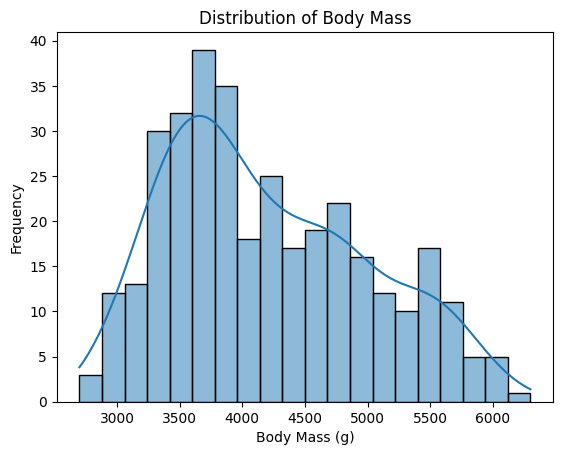

In [4]:
# 1.Histogram for Body Mass Distribution:
# Histogram for Body Mass Distribution
sns.histplot(df['body_mass_g'], bins=20, kde=True)
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()


*Observations:*

1.The distribution of body mass appears to be centered around 4,000 grams.

2.The body mass is more spread out towards the higher end (fatter bodies) than the lower end (slimmer bodies). This indicates a positive skew.

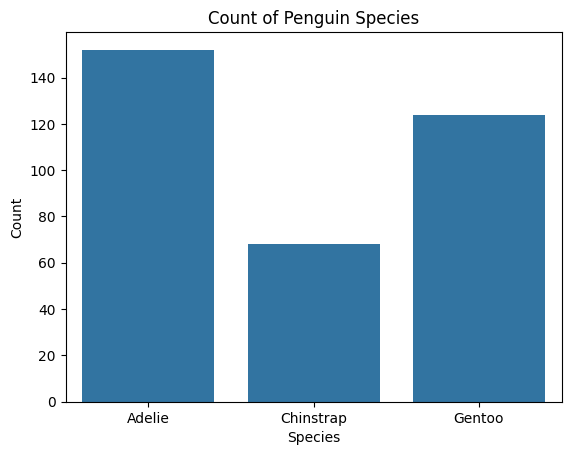

In [5]:
# 2.Countplot for Penguin Species:

# Countplot for Penguin Species
sns.countplot(data=df, x='species')
plt.title('Count of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


*Observations:*

1.The Adelie penguin is the most common species represented in the graph, with a count of around 140.

2.The Chinstrap penguin is the least common species represented in the graph, with a count of around 60.

3.The Gentoo penguin has a count of around 120.

*b.Bi-Variate Analysis:*

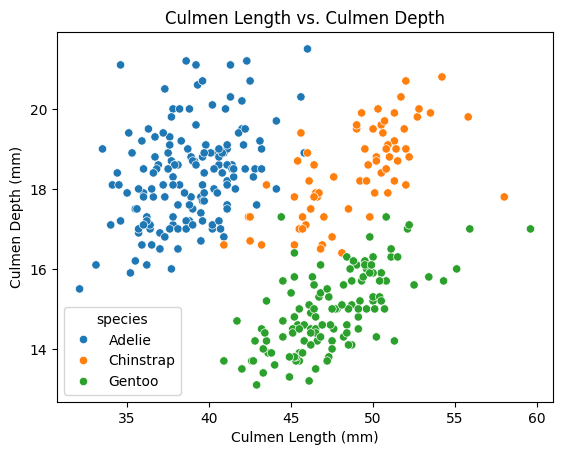

In [6]:
# 1.Scatter Plot for Bill Length vs. Bill Depth:

# Scatter Plot for Culmen Length vs. Culmen Depth
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Culmen Length vs. Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()


*Observations:*

1.There is a positive correlation between culmen length and culmen depth. This means that as culmen length increases, culmen depth also tends to increase.

2.culmen length is significantly larger than culmen depth. Most of the data points are clustered in the upper right portion of the plot, where culmen length is larger than culmen depth.

3.There is some variability in the data. While there is a positive correlation, not all birds with longer culmen necessarily have the deepest culmens. There are some data points scattered throughout the plot.

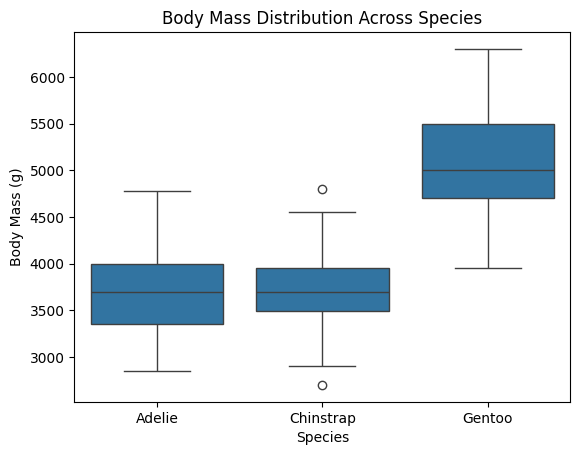

In [7]:
# 2.Pairplot for Body Mass, Flipper Length, and Species:
# Boxplot for Body Mass Distribution Across Species
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Body Mass Distribution Across Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()



*Observations:*

1.The body mass of the Adelie penguin is the lowest with a median of around 3500 grams.

2.The body mass of the Chinstrap penguin is slightly higher than the Adelie penguin with a median of around 4000 grams.

3.The body mass of the Gentoo penguin is the highest of the three species with a median of around 4500 grams.

4.The spread of body mass is larger for the Gentoo penguin compared to the other two species. This means that there is more variation in the body mass of Gentoo penguins.

5.There may be outliers in the body mass data for the Chinstrap penguin. The box plot shows that there are points that fall outside the whiskers for the Chinstrap penguin data. Points that fall outside the whiskers are considered to be outliers.

*c.Multi-Variate Analysis:*

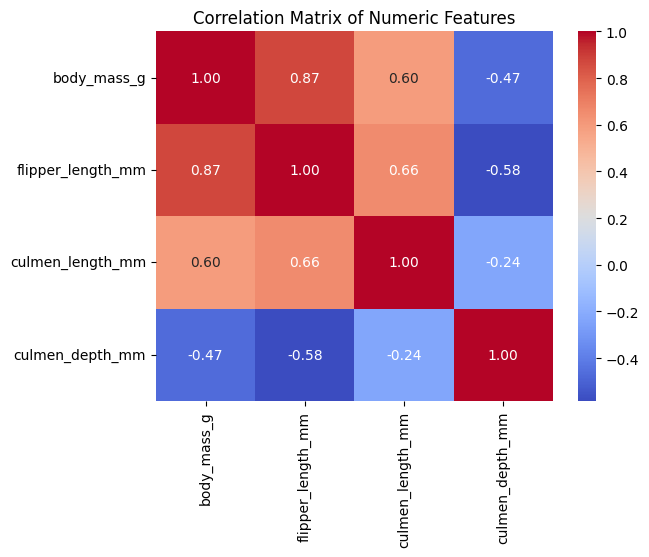

In [8]:
# Heatmap for Correlation Matrix of Numeric Features

correlation_matrix = df[['body_mass_g', 'flipper_length_mm', 'culmen_length_mm', 'culmen_depth_mm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()




*Observations:*

1.The value 1.0 in the diagonal of the matrix indicates a perfect positive correlation between a feature and itself.

2.The correlation values range from -1 to 1. A positive correlation value indicates a positive relationship between two features. A negative correlation value indicates a negative relationship between two features. A value of 0 indicates no correlation.

3.Body mass and flipper length have a positive correlation of 0.87. This means that as body mass increases, flipper length also tends to increase.

4.Body mass and culmen length have a positive correlation of 0.60. This means that as body mass increases, culmen length also tends to increase, but to a lesser extent than flipper length.

*4.Descriptive Statistics:*

In [9]:
# Descriptive Statistics
print(df.describe())


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


*5.Check for Missing Values:*

In [10]:
# Check for Missing Values
print(df.isnull().sum())


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


*Handle Missing Values:*


In [13]:
# Handle Missing Values
df.dropna(inplace=True)  # Drop rows with missing values
print(df)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

*7.Find and Replace Outliers:*

In [15]:
# Find and Replace Outliers (for example, using Z-score method)
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows with all features within 3 standard deviations
print(df)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

*8.Check for Categorical Columns and Perform Encoding:*

In [16]:
# Check for Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
# Perform Encoding (Label Encoding)
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(df)

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          0       2              39.1             18.7              181.0   
1          0       2              39.5             17.4              186.0   
2          0       2              40.3             18.0              195.0   
4          0       2              36.7             19.3              193.0   
5          0       2              39.3             20.6              190.0   
..       ...     ...               ...              ...                ...   
338        2       0              47.2             13.7              214.0   
340        2       0              46.8             14.3              215.0   
341        2       0              50.4             15.7              222.0   
342        2       0              45.2             14.8              212.0   
343        2       0              49.9             16.1              213.0   

     body_mass_g  sex  
0         3750.0    2  
1         3800.

*9.Split the Data into Dependent and Independent Variables:*

In [17]:
# Split the Data into Dependent and Independent Variables
X = df.drop('species', axis=1)
y = df['species']


*10. Scaling the data:*

In [18]:
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


*11. Split the data into training and testing:*

In [20]:
# Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*12. Build the Model*

In [21]:
# Build the Model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)


*13. Train the Model*

In [22]:
# Train the Model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

*14. Test the Model*

In [26]:
# Test the Model
y_pred = model.predict(X_test)


*15. Measure the performance using Evaluation Metrics.*

In [38]:
# Measure the Performance using Evaluation Metrics

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
